In [5]:
# This requires a installation of DROPStomo package. Use 'pip install DROPStomo' for installation.
# import all the requried packages
from DROPStomo import WQST1Q
from DROPStomo import WQST2Q
from DROPStomo import WQPT1Q

from turtle import circle
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
import time
from fractions import Fraction
from math import gcd
from numpy import pi
from qiskit import IBMQ

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere, visualize_transition, plot_bloch_vector
from qiskit.circuit.library import *
from qiskit import (QuantumRegister, ClassicalRegister, QuantumCircuit,
                    execute, Aer, compiler)
from qiskit.tools.monitor import job_monitor
from qiskit.tools import job_monitor, backend_monitor, backend_overview
from qiskit.quantum_info import Statevector
from qiskit.visualization import exceptions
from qiskit.visualization import latex as _latex
from qiskit.visualization import text as _text
from qiskit.visualization import utils
from qiskit.visualization import matplotlib as _matplotlib
import matplotlib as mpl

from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi


In [6]:
# provide a simulator. 
# you can also provide a quantum hardware from IBM quantum, please visit 'https://quantum-computing.ibm.com/services/resources?tab=systems' to check available devices.
simulator = Aer.get_backend('qasm_simulator')

In [7]:
# desgining a gate for preparaing a state to tomograph
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[1])
sub_circ.crx(1, sub_q[0], sub_q[1])
sub_circ.draw()

# resolution for scanning (which corresponds to number of sample points for tomography)
# just provide res_theta: resolution of theta. 
# resolution for phi (res_phi) = 2*res_theta-1
res_theta = 8

# this function returns quantum circuits and draw first quantum circuit.
# --Input--
# res_theta: resolution of polar angles for sampling between [0,pi] for tomography
# Up: gate for state preparation (which is provided by sub_circ here)
circ_q = WQST2Q.WQST_2Q_circuits(res_theta, sub_circ)

┌───────────┐ ░ ┌───────────┐ ░  ░ ┌─┐   
   q_0: ┤0          ├─░─┤ U3(0,0,0) ├─░──░─┤M├───
        │  sub_circ │ ░ ├───────────┤ ░  ░ └╥┘┌─┐
   q_1: ┤1          ├─░─┤ U3(0,0,0) ├─░──░──╫─┤M├
        └───────────┘ ░ └───────────┘ ░  ░  ║ └╥┘
meas: 2/════════════════════════════════════╩══╩═
                                            0  1

┌───────────┐ ░ ┌───────────┐ ░ ┌──────────────┐ ░ ┌─┐   
   q_0: ┤0          ├─░─┤ U3(0,0,0) ├─░─┤ U3(-π/2,0,0) ├─░─┤M├───
        │  sub_circ │ ░ ├───────────┤ ░ ├──────────────┤ ░ └╥┘┌─┐
   q_1: ┤1          ├─░─┤ U3(0,0,0) ├─░─┤ U3(-π/2,0,0) ├─░──╫─┤M├
        └───────────┘ ░ └───────────┘ ░ └──────────────┘ ░  ║ └╥┘
meas: 2/════════════════════════════════════════════════════╩══╩═
                                                            0  1

┌───────────┐ ░ ┌───────────┐ ░ ┌───────────────┐ ░ ┌─┐   
   q_0: ┤0          ├─░─┤ U3(0,0,0) ├─░─┤ U3(π/2,0,π/2) ├─░─┤M├───
        │  sub_circ │ ░ ├───────────┤ ░ ├───────────────┤ ░ └╥┘┌─┐
   q_1: ┤1          ├─░─┤ U3(0,0,0) ├─░─┤ U3(π/2,0,π/2) ├─░──╫─┤M├
        └───────────┘ ░ └───────────┘ ░ └───────────────┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════╩══╩═
                                                             0  1

┌───────────┐ ░ ┌───────────┐ ░  ┌──────────────┐ ░ ┌─┐   
   q_0: ┤0          ├─░─┤ U3(0,0,0) ├─░──┤ U3(-π/2,0,0) ├─░─┤M├───
        │  sub_circ │ ░ ├───────────┤ ░ ┌┴──────────────┤ ░ └╥┘┌─┐
   q_1: ┤1          ├─░─┤ U3(0,0,0) ├─░─┤ U3(π/2,0,π/2) ├─░──╫─┤M├
        └───────────┘ ░ └───────────┘ ░ └───────────────┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════╩══╩═
                                                             0  1

┌───────────┐ ░ ┌───────────┐ ░ ┌───────────────┐ ░ ┌─┐   
   q_0: ┤0          ├─░─┤ U3(0,0,0) ├─░─┤ U3(π/2,0,π/2) ├─░─┤M├───
        │  sub_circ │ ░ ├───────────┤ ░ └┬──────────────┤ ░ └╥┘┌─┐
   q_1: ┤1          ├─░─┤ U3(0,0,0) ├─░──┤ U3(-π/2,0,0) ├─░──╫─┤M├
        └───────────┘ ░ └───────────┘ ░  └──────────────┘ ░  ║ └╥┘
meas: 2/═════════════════════════════════════════════════════╩══╩═
                                                             0  1

Total number of ciruits for WQST for two-qubit are:600


Job 0 of 2
Job Status: job has successfully run


None

Job 1 of 2
Job Status: job has successfully run


None

State fidelity is: (0.9999361858846679-2.1611195240208906e-18j)
Experimental state is: [[ 4.98788338e-01+0.j          5.03757915e-01+0.00437276j
   1.59943214e-03+0.00252978j  2.03959744e-03+0.00404244j]
 [ 5.03757915e-01-0.00437276j  5.00309483e-01+0.j
  -1.56813893e-03+0.0004325j  -9.54893747e-04+0.00140714j]
 [ 1.59943214e-03-0.00252978j -1.56813893e-03-0.0004325j
   1.28010633e-04+0.j          3.75910366e-04+0.0004891j ]
 [ 2.03959744e-03-0.00404244j -9.54893747e-04-0.00140714j
   3.75910366e-04-0.0004891j   7.74168402e-04+0.j        ]]


(None, None)

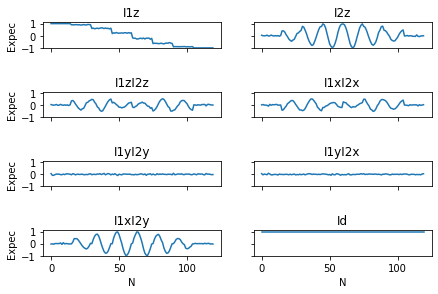

<Figure size 360x360 with 0 Axes>

In [8]:
# Target density matrix (important for calculating fidelity)
rhoT = 0.5*np.matrix([[1, 1, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])

# running quantum circuits 
# --Input--
# res_theta: resolution of polar angles for sampling between [0,pi] for tomography
# circuits: circuits for performing Wigner state tomography for single-qubit
# device: provide a simulator or a quantum device
# shots: number of shots
# inter: interactivity of tomographed droplets. 
    # If inter=0: provides a matplotlib plot with fixed point of view. 
    # If inter=1: provides a plotly plot with three-dimensional interactive droplets. (Chose me!!)
# rhoT: target density matrix

# --Output--
# tomographed state fidelity
# tomographed density matrix
# plot of expectation values (required for constructing droplets)
# droplet plots: identity droplet (corresponds to identity term of the density matrix) 
    # qubit1: droplet representing the corresponding Pauli component in the density matrix for first qubit.
    # qubit2: droplet representing the corresponding Pauli component in the density matrix for second qubit. 
    # correlations: droplet corresponding to correlations (bilinear) terms of density matrix.
    # The direction of the qubit reflects the direction of the Bloch vector (for qubit1 and qubit2) and color represents the phase given by arg[dropelt function].
    # color description: red- positive, green- negative, yellow-positive imaginary, blue-negative imaginary 
WQST2Q.WQST_2Q_runner(res_theta, circuits=circ_q,device=simulator,shots=1024,inter=1,rhoT=rhoT)
